In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import sys
import time

In [2]:
# Set up Motion Tracking 
tracker_type = 'KCF'
tracker = cv.TrackerMOSSE_create()

In [3]:
video = cv.VideoCapture("../Phase_D.mp4")
if not video.isOpened():
    print("Video Could Not Open")

status, frame = video.read()
if not status: 
    print("Frame could not be read")

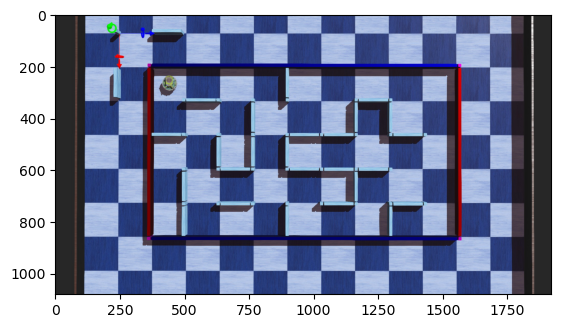

In [4]:
plt.imshow(frame)
plt.show()

In [5]:
bbox = cv.selectROI(frame, False)

status = tracker.init(frame, bbox)
while True: 
    status, frame = video.read()
    if not status: 
        break
    
    # Update Tracker 
    status, bbox = tracker.update(frame) 
    
    # Bounding box 
    if status: 
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv.rectangle(frame, p1, p2, (255,0,0), 2, 1)
    else: 
        # Tracking Failure 
        cv.putText(frame, "Failed Tracking", (100,80), cv.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)
    
    # Display 
    cv.putText(frame, tracker_type + " Tracker", (100,20),cv.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50),2)
    cv.imshow("Tracking", frame) 
              
    # Exit if ESC pressed 
    k = cv.waitKey(1) & 0xff 
    if k == 27 : break 
        
video.release() 
cv.destroyAllWindows()
